<a href="https://colab.research.google.com/github/ngocbaosp/ML-Projects/blob/master/ML_Lab_Assignment02_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course: Machine Learning


Assignment: 02


Student: Ngoc Bao Tran - 987034

# Load Dataset

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
%matplotlib inline

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


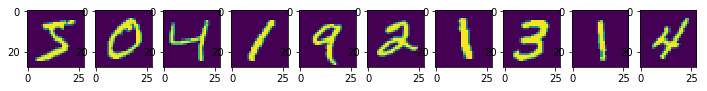

In [3]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 1
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

# Data Exploration and Preparation

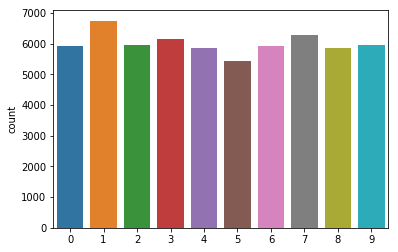

In [4]:
#View distribution of the label
sns.countplot(y_train)

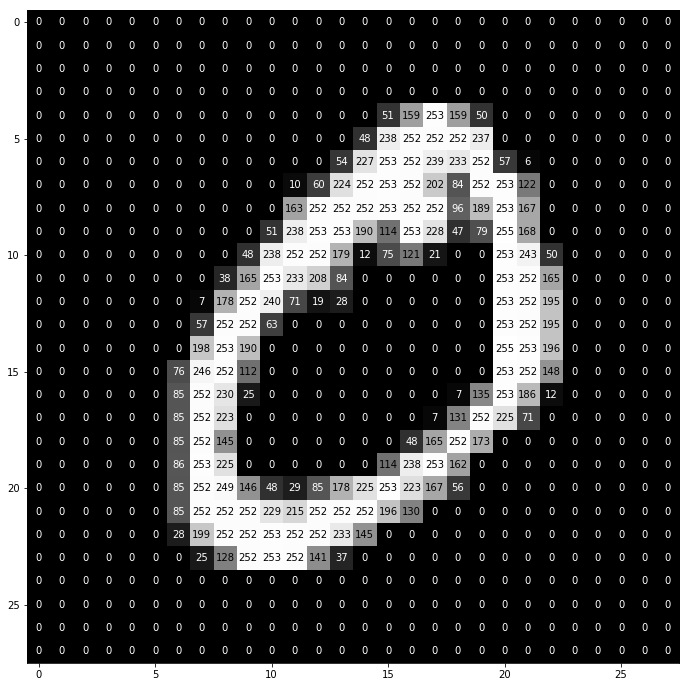

In [5]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x_train[1].reshape(28,28), ax)

The value of each pixel between 0 and 255 (gray scale)
So we should do nomalization 

## Normalization

In [6]:
maxValue = 255
X_train = x_train/maxValue
X_test = x_test/maxValue
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Reshape

In [7]:
import keras
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train.shape


(60000, 28, 28, 1)

In [8]:
num_classes=10
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)
Y_train.shape

(60000, 10)

# Convolutional Neural Network

## Define model

Construct CNN of few Conv and pool ,FC(dense), softmax 

In [0]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [0]:
batch_size = 64
epochs = 20
input_shape = (28, 28,1)


In [11]:


model = Sequential()

#Input layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#FC layers
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.compile(loss=keras.losses.categorical_crossentropy,
                       optimizer = keras.optimizers.Adam(),
                         metrics = ['accuracy'])


W0809 01:10:06.499002 139698374535040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 01:10:06.546911 139698374535040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 01:10:06.556278 139698374535040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 01:10:06.609847 139698374535040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0809 01:10:06.616001 139698374535040 deprecation_wrapp

## Visualize the model

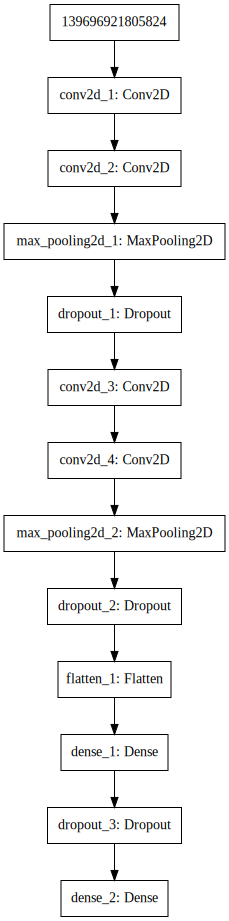

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,  show_shapes=False, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
__________

## Train the model

In [14]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

W0809 01:10:07.389575 139698374535040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 19s 386us/step - loss: 0.2827 - acc: 0.9113 - val_loss: 0.0556 - val_acc: 0.9825
Epoch 2/20
48000/48000 [==============================] - 12s 242us/step - loss: 0.0956 - acc: 0.9727 - val_loss: 0.0418 - val_acc: 0.9882
Epoch 3/20
48000/48000 [==============================] - 11s 238us/step - loss: 0.0746 - acc: 0.9773 - val_loss: 0.0346 - val_acc: 0.9900
Epoch 4/20
48000/48000 [==============================] - 11s 238us/step - loss: 0.0596 - acc: 0.9831 - val_loss: 0.0337 - val_acc: 0.9903
Epoch 5/20
48000/48000 [==============================] - 11s 234us/step - loss: 0.0504 - acc: 0.9849 - val_loss: 0.0328 - val_acc: 0.9903
Epoch 6/20
48000/48000 [==============================] - 11s 236us/step - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0307 - val_acc: 0.9908
Epoch 7/20
48000/48000 [==============================] - 11s 233us/step - loss: 0.0417 - acc: 0.9878 - val_loss: 0.

## Evaluation

In [15]:
model.evaluate(X_test,Y_test,verbose=1)

10000/10000 [==============================] - 1s 107us/step


[0.022050987297752317, 0.9937]

## Plot learning and validation curves

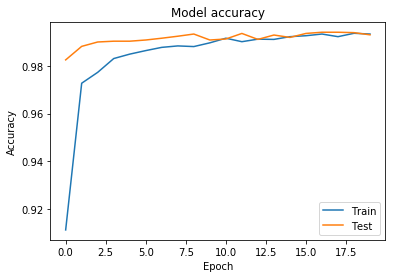

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()



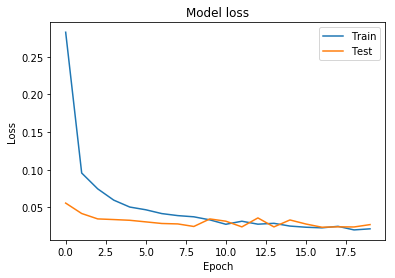

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Export and Import model

In [18]:
from sklearn.externals import joblib
joblib.dump(model, 'my_dt_model.pkl', compress=9)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['my_dt_model.pkl']

In [20]:
#%%
from sklearn.externals import joblib
model_clone = joblib.load('my_dt_model.pkl')
print(model_clone.evaluate(X_test,Y_test,verbose=1))

10000/10000 [==============================] - 1s 136us/step
[0.022050987297752317, 0.9937]


# References


https://www.kaggle.com/christofferr94/simple-cnn-with-keras-top-9


https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

https://keras.io/visualization/